<a href="https://colab.research.google.com/github/FrankYesid/Machine-Learning-ML-Guides/blob/main/Shap/Example_shap_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejemplo de cómo utilizar SHAP (SHapley Additive exPlanations) para interpretar un modelo de clasificación después de entrenarlo:
"""https://christophm.github.io/interpretable-ml-book/shap.html#shap-feature-importance"""

In [1]:
# @title Install
!pip install xgboost
!pip install shap

In [2]:
#@title Import necessary packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import os
import xgboost
import shap
import keras
from keras import layers
from keras.utils import to_categorical
import transformers
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import keras.backend as K
import numpy as np
import json

In [4]:
os.listdir()

['.config', 'sample_data']

In [18]:
# Data in https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download
df = pd.read_csv('input/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
# @title Define features and target
X,y = df.iloc[:, :-1], df.iloc[:, -1]

In [20]:
#@title Split the dataset into 75% for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [21]:
# Model
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

In [22]:
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

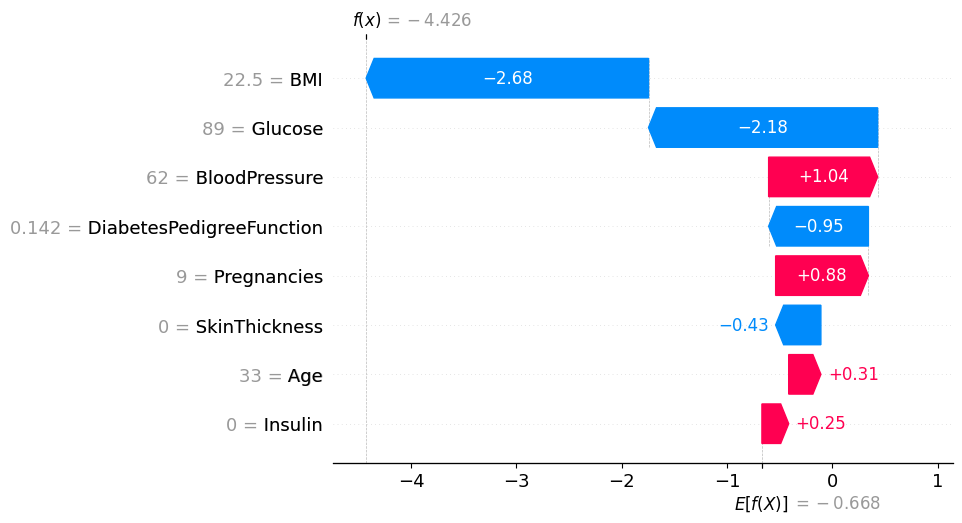

In [86]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [95]:
shap_values[:, 'BloodPressure']

.values =
array([ 1.0350225 , -0.43572843, -0.8124399 , -0.16891465, -0.5282265 ,
        0.57782316,  0.6491695 , -0.756572  ,  0.82021856,  0.74191105,
        0.1280789 , -1.2769521 ,  1.3066721 , -0.5351626 , -0.32274   ,
       -0.29472458, -0.20748818,  0.16727042,  0.32861194,  0.507455  ,
        0.17573261,  0.6190063 , -0.38787523, -0.75453985,  0.87486744,
        1.1631882 ,  0.58312136, -0.8414011 ,  1.3014548 ,  0.42291406,
       -0.6278377 , -0.14260422, -1.3447578 , -1.2898524 , -0.10008169,
       -0.468014  , -0.05462921, -0.6245398 , -0.7451747 , -0.6036475 ,
       -0.11463216,  0.09977969, -0.63314223,  0.4317431 , -0.2566712 ,
       -0.7211443 ,  0.28853777, -0.27593333, -0.44612354,  2.0008798 ,
       -0.6305954 , -0.56308943,  0.5828099 , -0.40021354, -0.46634558,
       -0.49689683, -0.49557418,  0.18338616, -0.86958575, -0.43966493,
       -0.34739968,  2.3205936 , -0.7828291 , -0.10805684, -0.6647024 ,
       -0.4328072 , -0.7059201 , -0.6343769 ,  0.87465

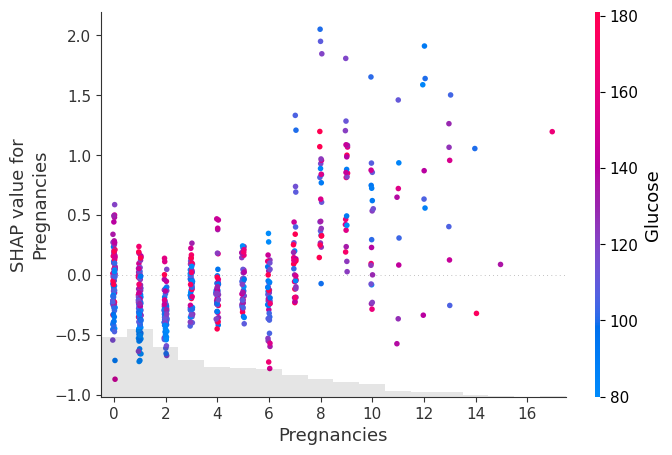

In [90]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "Pregnancies"], color=shap_values)

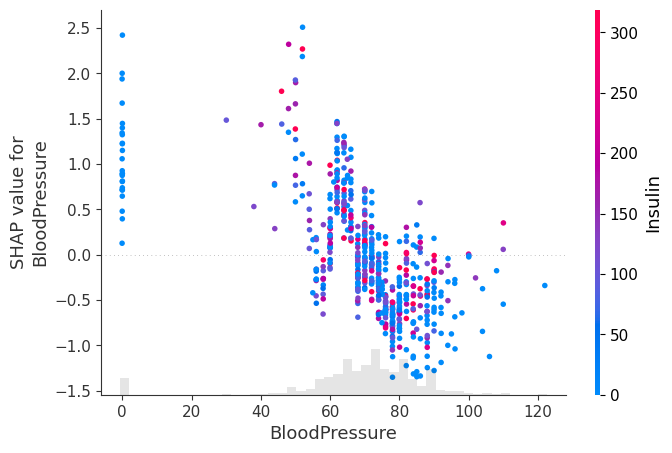

In [96]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "BloodPressure"], color=shap_values)

In [102]:
type(shap_values)

shap._explanation.Explanation

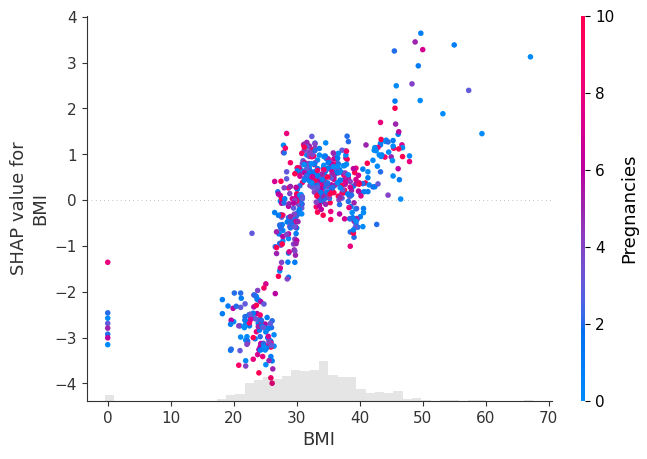

In [97]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "BMI"], color=shap_values)

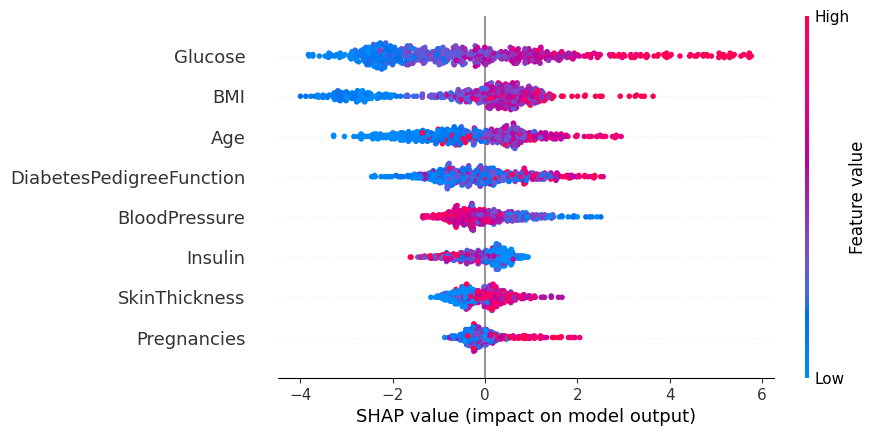

In [91]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

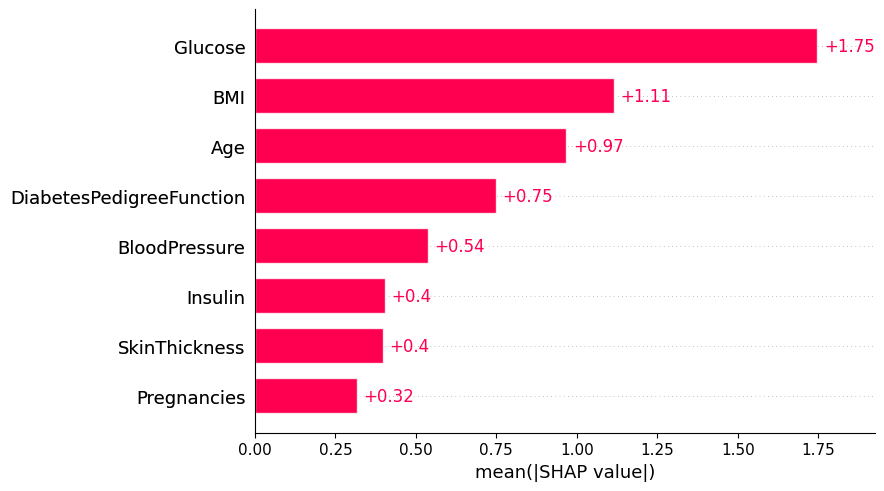

In [103]:
shap.plots.bar(shap_values)

LIME (Explicaciones Locales Interpretables Modelo-Agnósticas) se utiliza ampliamente para explicar modelos de caja negra a nivel local. Cuando tenemos modelos complejos como CNN, LIME utiliza un modelo simple y explicativo para comprender su predicción. Para hacerlo aún más fácil de entender, veamos cómo funciona LIME paso a paso:

Definir tu punto local: Elige una predicción específica que desees explicar (por ejemplo, por qué una imagen fue clasificada como un gato por una CNN).
Generar variaciones: Crea ligeras variaciones en los datos de entrada (por ejemplo, píxeles ligeramente modificados en la imagen).
Predecir con el modelo original: Pasa la entrada a la CNN y obtén la clase de salida predicha para cada variación.
Construir un modelo explicativo: Entrena un modelo lineal simple para explicar la relación entre las variaciones y las predicciones del modelo.
Interpretar el modelo explicativo: Ahora, puedes interpretar el modelo explicativo con cualquier método como importancia de características, PDP, etc. para entender qué características jugaron un papel crucial en la predicción original.

Aplicaciones del mundo real
La Inteligencia Artificial Explicable es el puente que construye la confianza entre el mundo de la tecnología y los humanos. Veamos algunos ejemplos poderosos de Inteligencia Artificial Explicable en nuestro mundo cotidiano:

Prácticas justas de préstamos: La Inteligencia Artificial Explicable (XAI) puede proporcionar a los bancos explicaciones claras para las negaciones de préstamos. Las empresas pueden estar libres de riesgos de cumplimiento y también mejorar la confianza de su base de clientes.

Eliminar sesgos en la contratación: Muchas empresas utilizan sistemas de IA para filtrar inicialmente un gran número de solicitudes de empleo. Las herramientas XAI pueden revelar cualquier sesgo incrustado en los algoritmos de contratación impulsados por IA. Esto garantiza prácticas de contratación justas basadas en el mérito, no en sesgos ocultos.

Aumentar la adopción de vehículos autónomos: ¿Cuántos de ustedes confiarían en un coche sin conductor hoy? La XAI puede explicar el proceso de toma de decisiones de los coches autónomos en la carretera, como cambios de carril o maniobras de emergencia. Esto mejorará la confianza de los pasajeros.

Mejorar el diagnóstico médico: La XAI puede proporcionar transparencia en el proceso de diagnóstico al ofrecer una explicación post hoc de las salidas del modelo o diagnósticos. Esto permite a los profesionales médicos obtener una visión más holística del caso del paciente en cuestión.

Encuentra un ejemplo que involucre el diagnóstico de una infección por COVID-19 en la imagen a continuación.

# Example 2

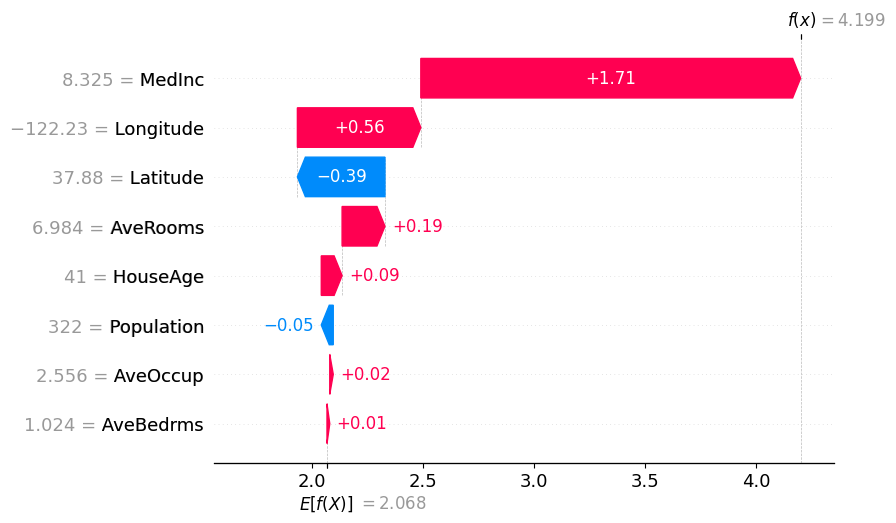

In [23]:
# train an XGBoost model
X, y = shap.datasets.california()
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

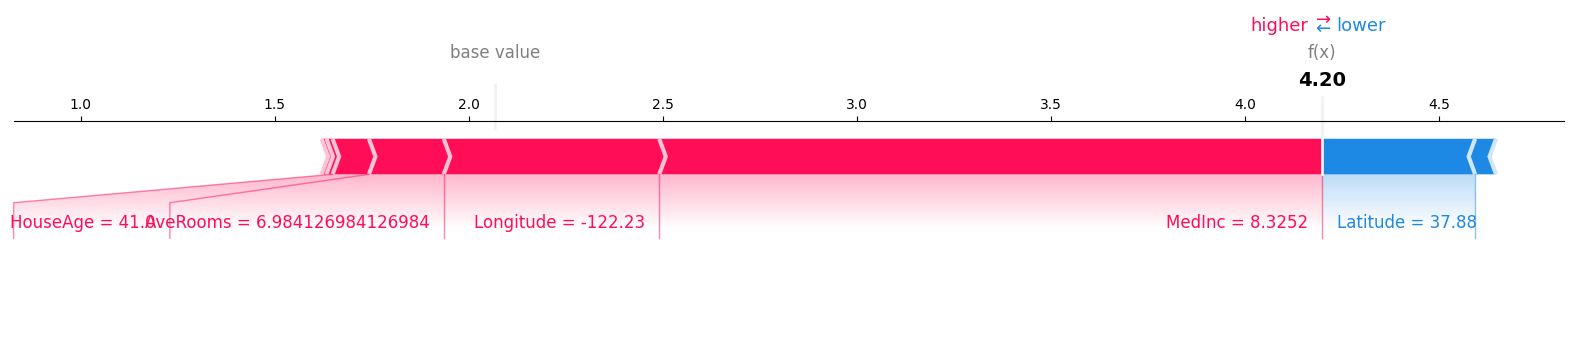

In [33]:
# visualize the first prediction's explanation with a force plot
# shap.plots.force(shap_values[0])
shap.plots.force(shap_values[0], matplotlib=True)

In [24]:
shap.initjs()
shap.plots.force(shap_values[:500])

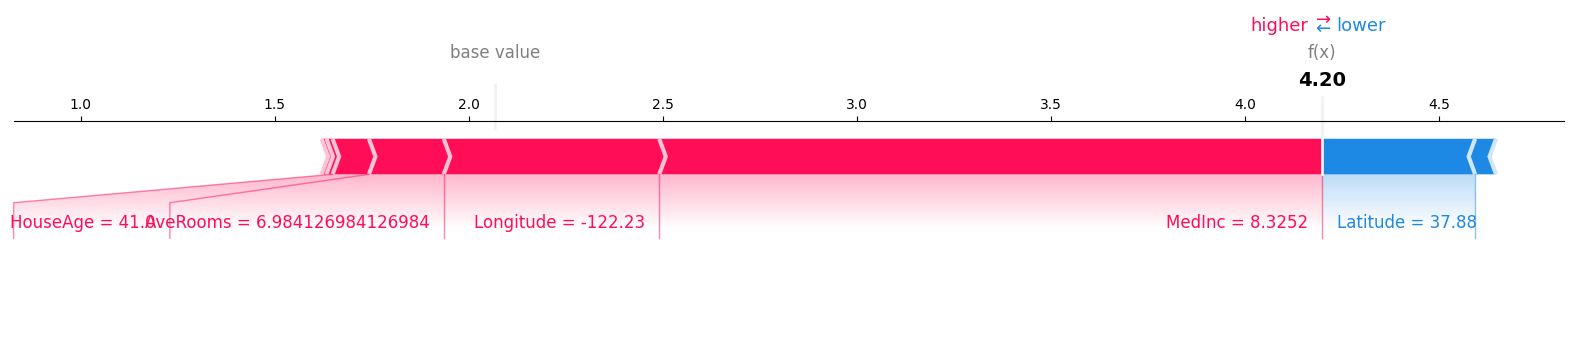

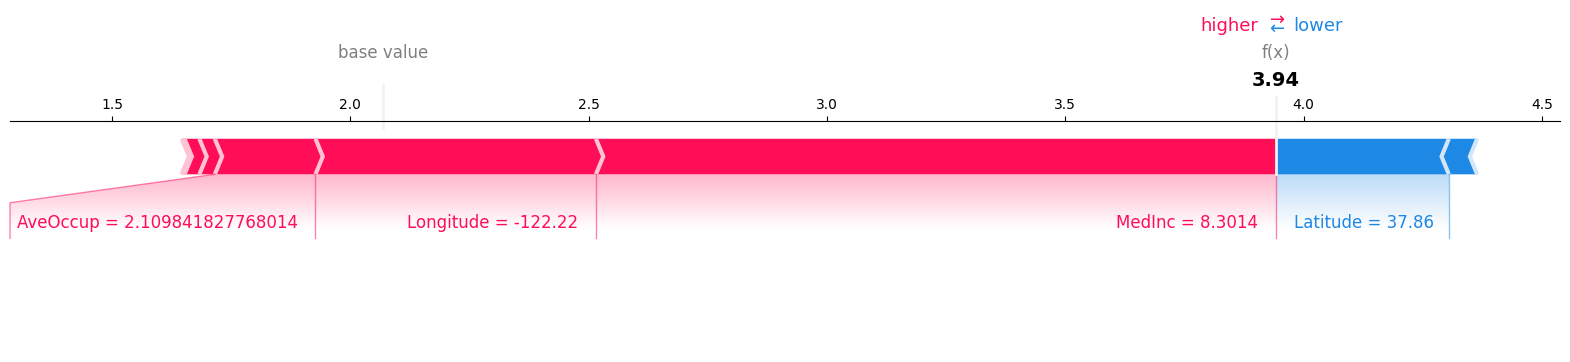

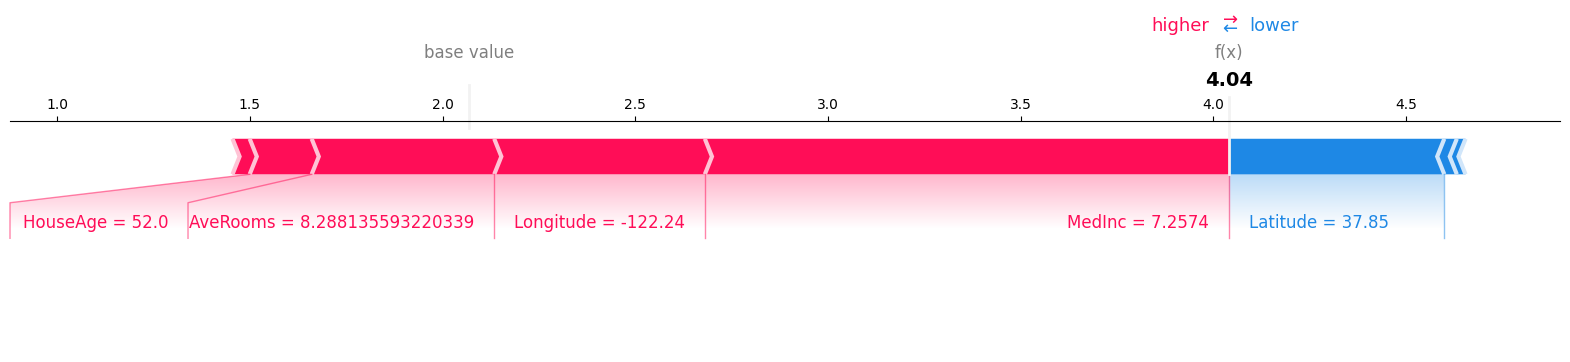

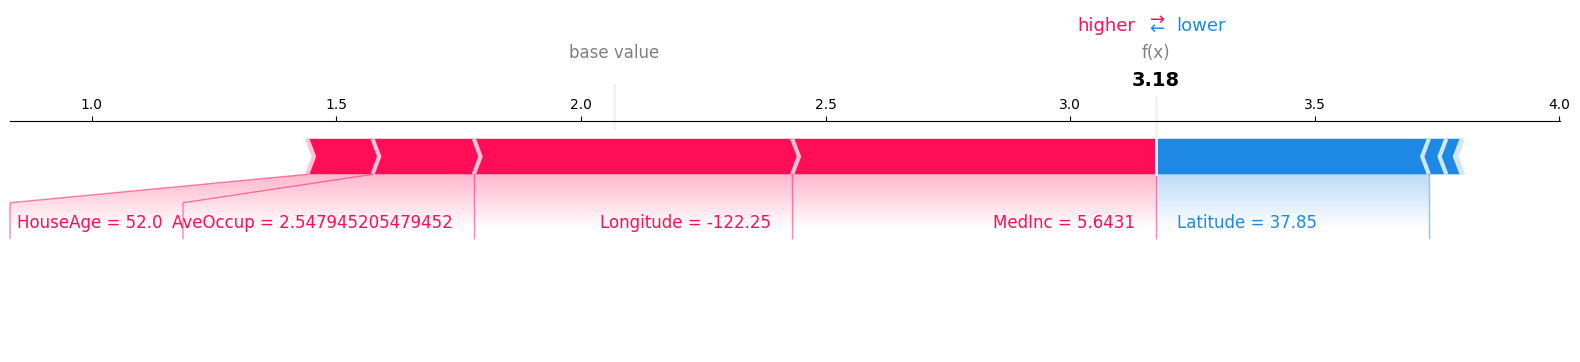

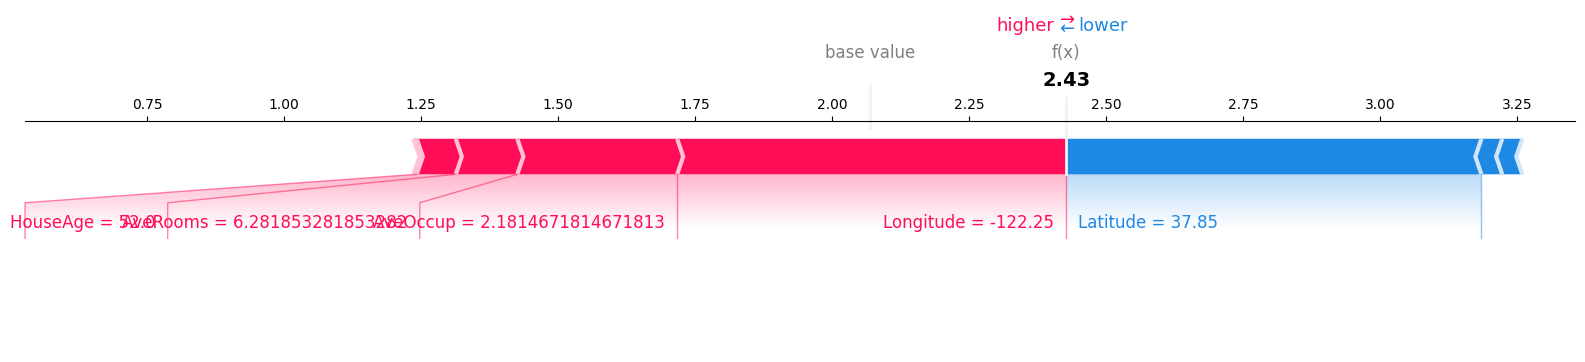

In [40]:
# visualize all the training set predictions
# shap.plots.force(shap_values[:500])
for i in range(5):  # Visualizar las primeras 500 predicciones
    shap.plots.force(shap_values[i], matplotlib=True)

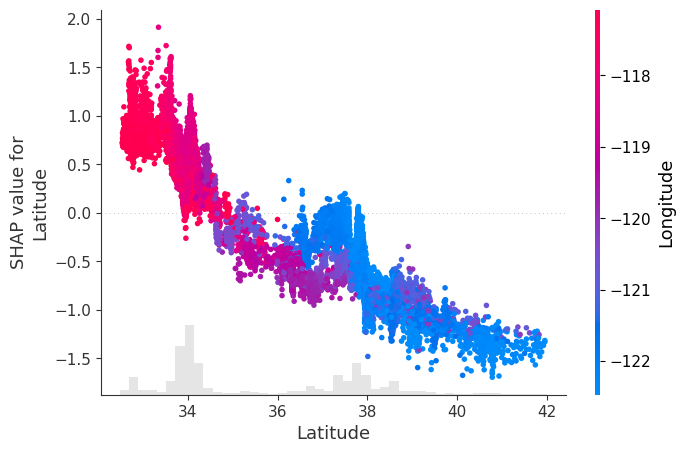

In [28]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "Latitude"], color=shap_values)

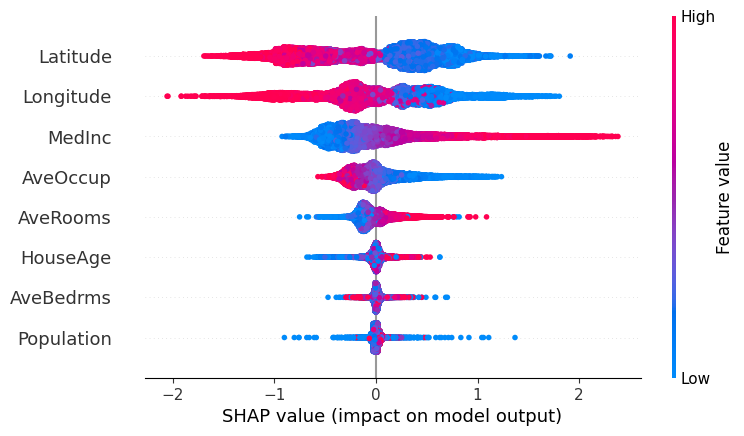

In [29]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

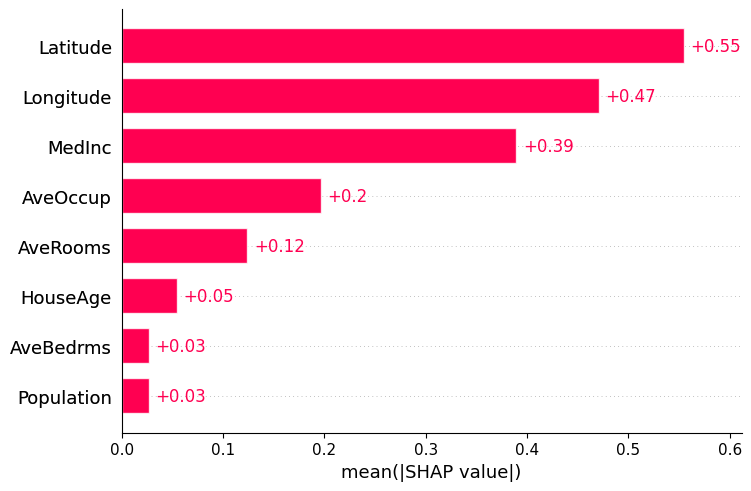

In [30]:
shap.plots.bar(shap_values)

# Example 3

In [104]:
# load a transformers pipeline model
model = transformers.pipeline('sentiment-analysis', return_all_scores=True)

# explain the model on two sample inputs
explainer = shap.Explainer(model)
shap_values = explainer(["What a great movie! ...if you have no taste."])

# visualize the first prediction's explanation for the POSITIVE output class
shap.plots.text(shap_values[0, :, "POSITIVE"])

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

  0%|          | 0/240 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:45, 45.33s/it]               


# Example 5

In [111]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

batch_size = 128
epochs = 3

model = keras.Sequential(
    [
        layers.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

model.compile(
    loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)

model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1
)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

11490434/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)         

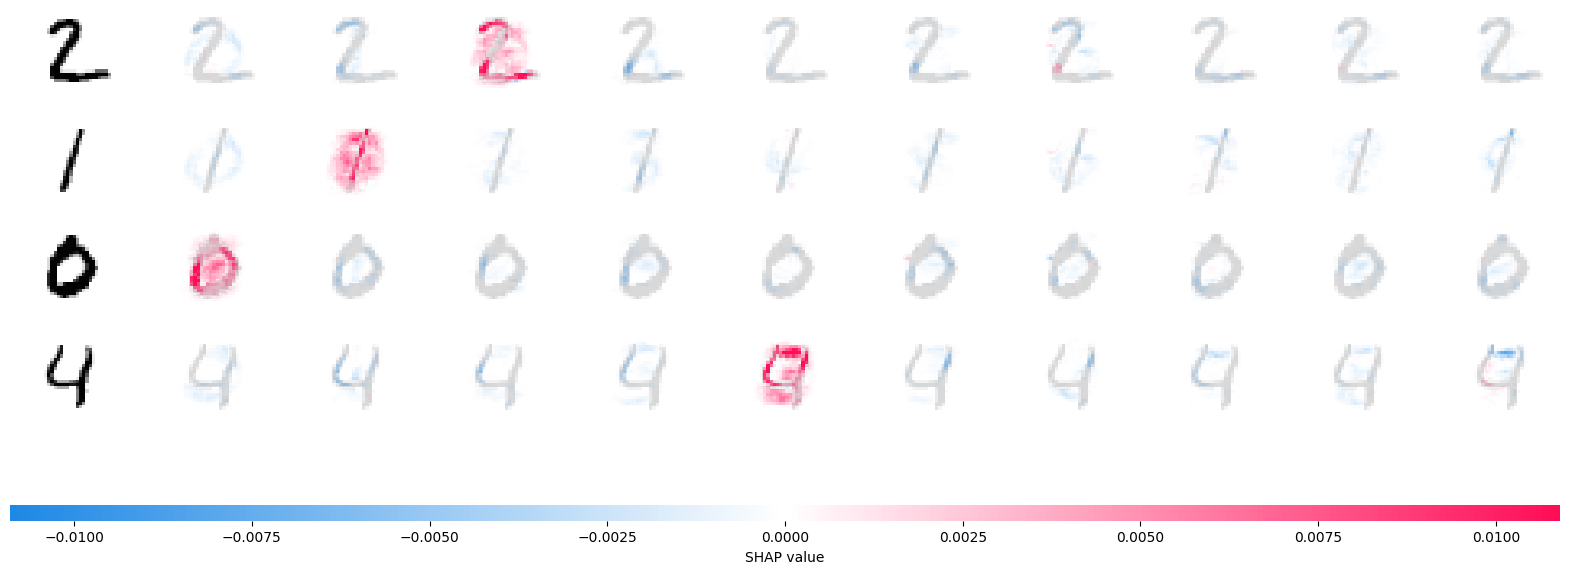

In [114]:
# ...include code from https://github.com/keras-team/keras/blob/master/examples/demo_mnist_convnet.py
# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

# explain predictions of the model on four images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(x_test[1:5])

# plot the feature attributions
shap.image_plot(shap_values, -x_test[1:5])

# Example 6

Deep learning example with GradientExplainer (TensorFlow/Keras/PyTorch models)

In [3]:
import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [4]:
# load pre-trained model and choose two images to explain
model = VGG16(weights='imagenet', include_top=True)
X, y = shap.datasets.imagenet50()
to_explain = X[[39, 41]]

# load the ImageNet class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
fname = shap.datasets.cache(url)
with open(fname) as f:
    class_names = json.load(f)

input_tensor_ref = K.placeholder(shape=(None, 224, 224, 3))
tensor_dict = {input_tensor_ref.ref(): "some value"}

# explain how the input to the 1th layer of the model explains the top two classes
def map2layer(x, layer):
    feed_dict = {model.input: preprocess_input(X.copy())}
    return K.get_session().run(model.layers[layer].input, feed_dict)

e = shap.GradientExplainer((model.layers[1].input, model.layers[-1].output), map2layer(X, 1), local_smoothing=0)


In [6]:
e.shap_values

<bound method GradientExplainer.shap_values of <shap.explainers._gradient.GradientExplainer object at 0x7dbdcc107670>>

In [ ]:
shap_values, indexes = e.shap_values(map2layer(to_explain, 1), ranked_outputs=2)

# get the names for the classes
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)

# plot the explanations
shap.image_plot(shap_values, to_explain, index_names)


In [9]:
model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [14]:
preprocess_input(X.copy()).shape

(50, 224, 224, 3)

Las predicciones para dos imágenes de entrada se explican en la gráfica de arriba. Los píxeles rojos representan valores SHAP positivos que aumentan la probabilidad de la clase, mientras que los píxeles azules representan valores SHAP negativos que reducen la probabilidad de la clase. Al usar ranked_outputs=2 explicamos solo las dos clases más probables para cada entrada (esto nos evita tener que explicar las 1,000 clases).

# Example 7

In [3]:
import sklearn
import shap
from sklearn.model_selection import train_test_split

# print the JS visualization code to the notebook
shap.initjs()

# train a SVM classifier
X_train,X_test,Y_train,Y_test = train_test_split(*shap.datasets.iris(), test_size=0.2, random_state=0)
svm = sklearn.svm.SVC(kernel='rbf', probability=True)
svm.fit(X_train, Y_train)

# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(svm.predict_proba, X_train, link="logit")
shap_values = explainer.shap_values(X_test, nsamples=100)

# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:], link="logit")

  0%|          | 0/30 [00:00<?, ?it/s]

In [11]:
shap.initjs()

In [9]:
!pip install shap --upgrade

In [10]:
# plot the SHAP values for the Setosa output of all instances
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test, link="logit")

In [17]:
shap.initjs()
shap.force_plot(base_value=explainer.expected_value[0], shap_values=shap_values[0], features=X_test)

In [ ]:
shap.TreeExplainer(model).shap_interaction_values(X)

Sample notebooks

Citaciones: Los algoritmos y visualizaciones utilizados en este paquete provienen principalmente de investigaciones en el laboratorio de Su-In Lee en la Universidad de Washington y en Microsoft Research. Si utilizas SHAP en tu investigación, agradeceríamos una citación al(s) artículo(s) correspondiente(s):

Para el uso general de SHAP, puedes leer/citar nuestro artículo de NeurIPS (bibtex). Para TreeExplainer, puedes leer/citar nuestro artículo de Nature Machine Intelligence (bibtex; acceso gratuito). Para GPUTreeExplainer, puedes leer/citar este artículo. Para visualizaciones force_plot y aplicaciones médicas, puedes leer/citar nuestro artículo de Nature Biomedical Engineering (bibtex; acceso gratuito).